<a href="https://colab.research.google.com/github/tirumanagirisivasai/Deep-Learning-lab-Programs/blob/main/Experiment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import numpy as np

np.random.seed(50)
def stepfunction(value):
  return np.where(value>0,1,0)

In [113]:
#Actual perceptron
#Just call it by creating an object for Perceptron
class Perceptron:
  def __init__(self, l_rate, n_epochs):
    self.epochs = n_epochs
    self.rate = l_rate
    self.weights = None
    self.activ_function = stepfunction
    self.bias = None

  def train(self,X,Y):
    n_samples, n_features = X.shape #returns (len_dataset, n_features)
    self.weights = np.random.rand(1,n_features)
    self.bias = 0.01
    labels_input = np.where(Y>0,1,0)
    for _ in range(self.epochs):
      for idx,x_i in enumerate(X):
        linear_output = np.dot(x_i, self.weights.T)+self.bias
        y_pred = self.activ_function(linear_output)

        #update the weights and bias
        self.weights += (labels_input[idx] - y_pred)*self.rate*x_i
        self.bias += (labels_input[idx] - y_pred)*self.rate
    return self.weights
  #for prediction of test data
  def predict(self, test_data):
    output = np.dot(test_data, self.weights.T) + self.bias
    ypred = self.activ_function(output)
    return ypred.flatten()

In [114]:
#test the perceptron
data = []
for _ in range(100):
  temp = np.random.rand(5)
  data.append(temp)
input_data = np.array(data)
input_labels = np.round(np.random.rand(100))

In [115]:
#obj for class

p = Perceptron(l_rate=0.01, n_epochs=1000)
p.train(input_data, input_labels)

#predicted = p.predict(test)

array([[ 0.00698276, -0.01202013,  0.00482969,  0.00841049, -0.00997503]])

In [116]:
predicted_labels = p.predict(np.array(input_data[:50,:]))

In [117]:

print(f'Predicted labels: {predicted_labels}')
print(f'Actual labels: {input_labels[:50,]}')

Predicted labels: [1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1
 0 0 0 1 1 1 1 0 0 1 1 1 0]
Actual labels: [1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.
 1. 0.]


In [118]:
predicted_labels.shape

(50,)

In [119]:
input_labels[:50,].shape

(50,)

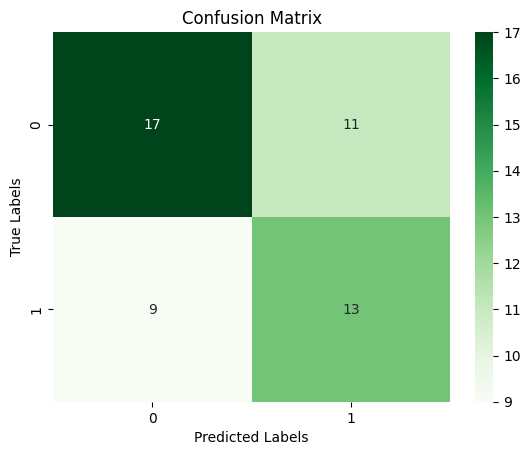

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming predicted_labels and input_labels are defined and contain the appropriate data

# Calculate confusion matrix
conf_matrix = confusion_matrix(input_labels[:50,], predicted_labels)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Greens', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
